## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [34]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice.
mouse_count = mouse_study_df["Mouse ID"].count()
mouse_count

1893

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = mouse_study_df[mouse_study_df.duplicated(["Mouse ID"])]
all_duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study_df.drop_duplicates("Mouse ID")
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [39]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_mice["Mouse ID"].count()
new_mouse_count

249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stat_mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
stat_median = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
stat_var = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stat_std = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stat_sem = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary_df = pd.DataFrame({"Mean": stat_mean,
                                "Median": stat_median,
                                "Variance": stat_var,
                                "Standard Deviation": stat_std,
                                "SEM": stat_sem})
tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary_df
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_df.agg(['mean', 'median', 'var', 'std', 'sem'])

,Mean,Median,Variance,Standard Deviation,SEM
mean,50.976144,49.942960,47.708346,6.809671,0.499641
median,53.060651,51.819532,45.831020,6.766916,0.514641
var,31.599380,22.206987,257.831210,1.485251,0.010515
std,5.621333,4.712429,16.057123,1.218709,0.102544
sem,1.777621,1.490201,5.077708,0.385390,0.032427


## Bar and Pie Charts

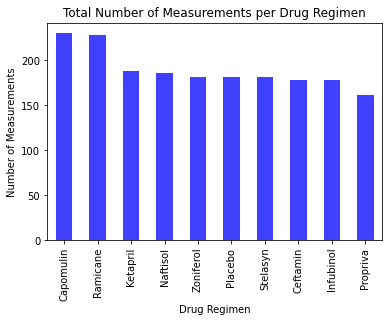

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot_pd = mouse_study_df["Drug Regimen"].value_counts().plot.bar(facecolor="blue", alpha=0.75, width=0.5, align="center")

# Generating title and labels for X & Y axis
bar_plot_pd.set_title("Total Number of Measurements per Drug Regimen")
bar_plot_pd.set_xlabel("Drug Regimen")
bar_plot_pd.set_ylabel("Number of Measurements")

# Showing the bar plot
bar_plot_pd

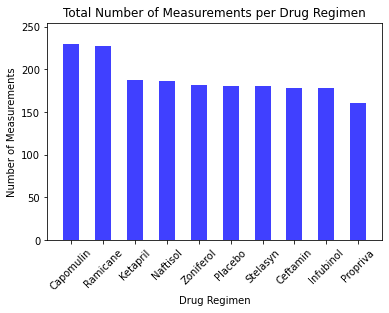

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = mouse_study_df["Drug Regimen"].value_counts()

x_axis = np.arange(0, len(drug_regimen))
tick_locations = [value for value in x_axis]

# Titling and labeling the X & Y axis
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Setting axes length
plt.xlim(-0.75, len(drug_regimen) -.25)
plt.ylim(0, max(drug_regimen) + 25)

# Aesthetics... blue bars, center alugnment, changing bar width, rotating x-axis labels vertical
plt.bar(x_axis, drug_regimen, facecolor="blue", alpha=0.75, width=0.5, align="center")
plt.xticks(tick_locations, drugs.index.values, rotation=45)

# Showing the plot
plt.show()

Text(0, 0.5, '')

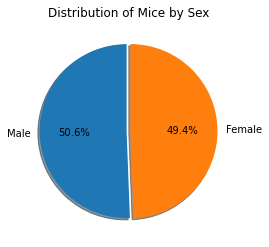

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_pie = mouse_study_df["Sex"].value_counts()
explode = [.025, 0.02]

gender_pie = mouse_pie.plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution of Mice by Sex", explode=explode, shadow=True)
gender_pie.set_ylabel('')

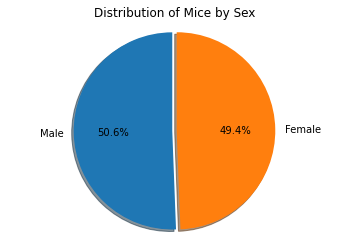

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution of Mice by Sex")
plt.pie(mouse_pie, explode=explode, labels=mouse_pie.index.values, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = pd.DataFrame(mouse_study_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge_df = pd.merge(mouse_study_df, timepoint_df, on="Mouse ID")
timepoint_merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drugs_value = []

for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = timepoint_merge_df.loc[timepoint_merge_df["Drug Regimen"] == drug]
    
    final_vol_df = temp_df.loc[temp_df["Timepoint"] == temp_df["Max Timepoint"]]
    
    values = final_vol_df["Tumor Volume (mm3)"]
    drugs_value.append(values)
    
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
        
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
        
    outlier_count = values.loc[(final_vol_df["Tumor Volume (mm3)"] < lower_bound) | 
                               (final_vol_df["Tumor Volume (mm3)"] > upper_bound)].count()
    
    # Print results
    print(f'''
    {drug} has an IQR of: {iqr}
    
    {drug} values below {lower_bound} and above {upper_bound} could be outliers
    
    {drug} has {outlier_count} outlier(s)''')




    Capomulin has an IQR of: 7.781863460000004
    
    Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
    
    Capomulin has 0 outlier(s)

    Ramicane has an IQR of: 9.098536719999998
    
    Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
    
    Ramicane has 0 outlier(s)

    Infubinol has an IQR of: 11.477135160000003
    
    Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
    
    Infubinol has 1 outlier(s)

    Ceftamin has an IQR of: 15.577752179999997
    
    Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers
    
    Ceftamin has 0 outlier(s)


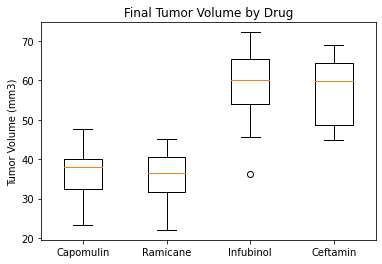

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drugs_value)

plt.title("Final Tumor Volume by Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Tumor Treatment for Mouse ID "m601"')

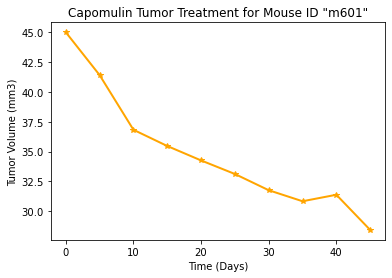

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == 'm601']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], linewidth=2, marker="*", color="orange")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Tumor Treatment for Mouse ID "m601"')

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
